In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#为matplotlib设置seaborn风格
sns.set()
#seaborn字体不支持中文，这里进行中文支持设置
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [2]:
#预设置项目
#总投票人数
STAFF_NUM=5
#侯选人名单
NAME_LIST=['张','王','刘','马','赵']
#评定项目
columns=['品德','作风','工作']
#评价等级
VOTE_LEVEL=['优','良','差']

In [3]:
df=pd.read_table('vote.txt',header=None,names=columns,sep=' ')

df['姓名']=NAME_LIST*STAFF_NUM

for i in columns:
    df[i+'评定'] =  pd.cut(df[i], bins = [0, 1, 2, float('Inf')], labels = VOTE_LEVEL[::-1], right = True)

In [4]:
df

,品德,作风,工作,姓名,品德评定,作风评定,工作评定
0,3,2,3,张,优,良,优
1,3,3,2,王,优,优,良
2,3,1,1,刘,优,差,差
3,3,3,3,马,优,优,优
4,3,1,1,赵,优,差,差
5,2,1,1,张,良,差,差
6,3,3,3,王,优,优,优
7,1,1,3,刘,差,差,优
8,1,1,2,马,差,差,良
9,3,3,1,赵,优,优,差


In [5]:
#定义可视化函数，实现同一人的横向对比
def result_to_plot(array):
    for i in array:
        fig=plt.figure(figsize=(10,5))
        plt.title(i+u"的评定情况");
        plt.xticks([])
        plt.yticks([])
        ax1=fig.add_subplot(131)
        df['品德评定'][df['姓名']==i].value_counts().plot(kind='bar', label=i,color='#FA2479');
        ax1.set_xticklabels(VOTE_LEVEL, rotation=0);
        ax1.set_ylim(0,4)
        ax1.set_yticks([0,1,2,3,4])
        ax1.set_yticklabels([0,1,2,3,4],minor=False)
        ax1.legend([u"品德"], loc='best');

        ax2=fig.add_subplot(132, sharey=ax1)
        df['作风评定'][df['姓名']==i].value_counts().plot(kind='bar', label=i,color='green');
        ax2.set_xticklabels(VOTE_LEVEL, rotation=0);
        ax2.legend([u"作风"], loc='best');

        ax3=fig.add_subplot(133, sharey=ax1)
        df['工作评定'][df['姓名']==i].value_counts().plot(kind='bar', label=i, color='steelblue');
        ax3.set_xticklabels(VOTE_LEVEL, rotation=0);
        ax3.legend([u"工作"], loc='best');

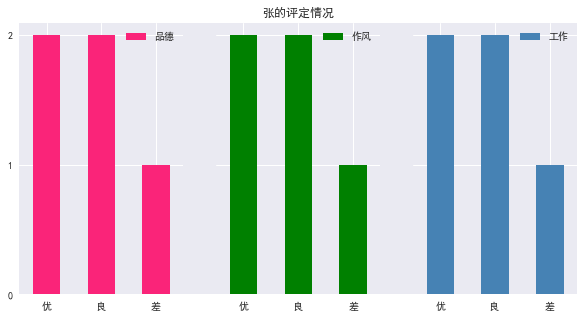

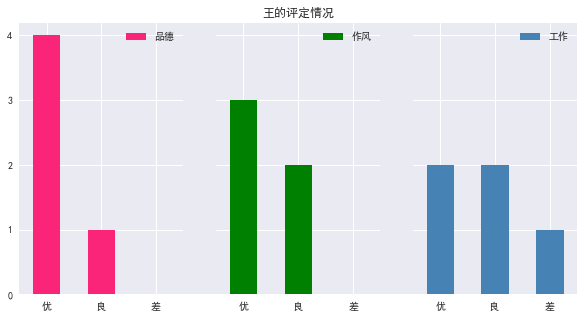

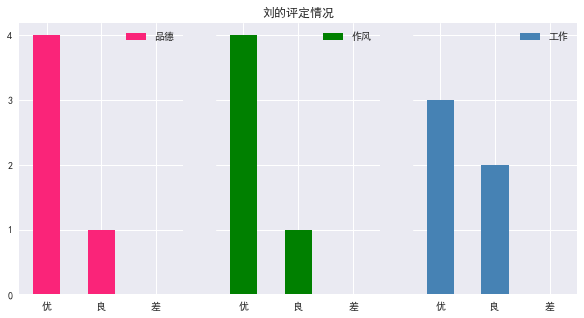

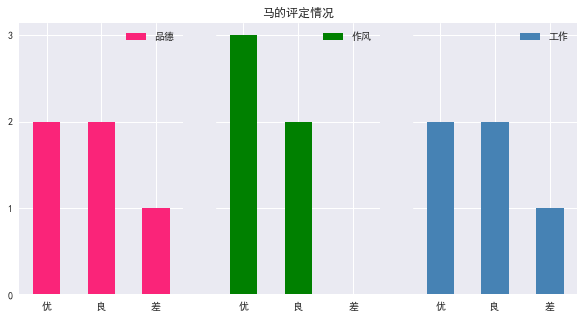

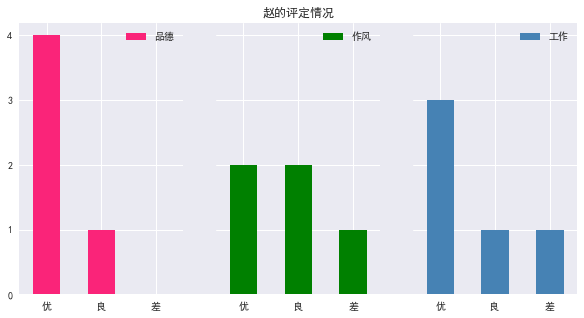

In [6]:
result_to_plot(NAME_LIST)

In [52]:
tem=[]
for i in columns:
    temp=df.groupby('姓名')[i+'评定'].value_counts().unstack().fillna(0).applymap(int)
    tem.append(temp[VOTE_LEVEL])

df_result=pd.concat(tem,axis=1,keys=columns)
df_result.index.names=['姓名']
df_result.columns.names=['评定','级别']

In [53]:
df_result

评定 品德       作风       工作      
级别  优  良  差  优  良  差  优  良  差
姓名                           
刘   4  0  1  1  0  4  3  0  2
张   2  1  2  1  2  2  1  2  2
王   4  1  0  2  0  3  2  1  2
赵   4  1  0  2  2  1  1  1  3
马   2  1  2  2  0  3  1  2  2

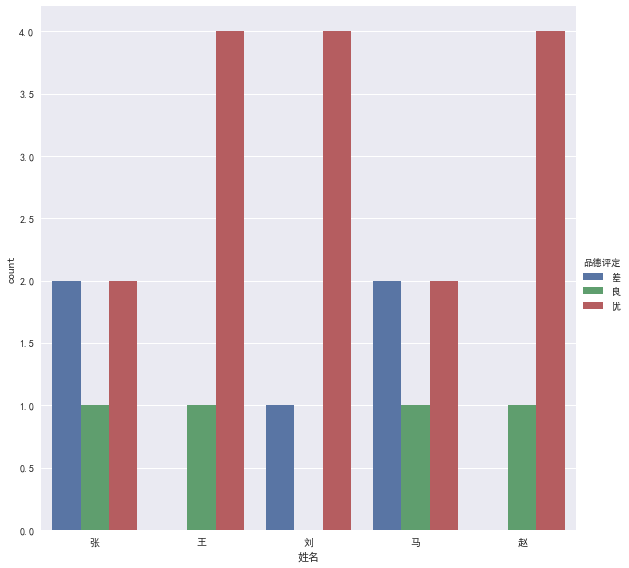

In [107]:
sns.factorplot('姓名',data=df,kind='count',hue='品德评定',size=8);

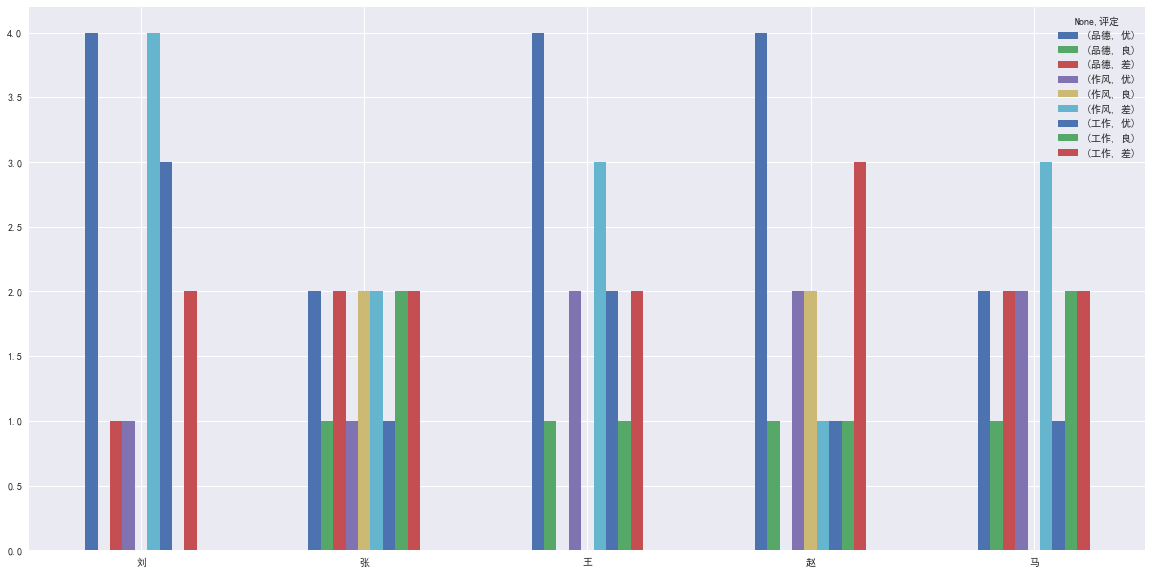

In [34]:
df_result.plot(kind='bar',figsize=(20,10),rot=1,legend=True);

In [58]:
g = sns.FacetGrid(df_result, col='姓名')
g.map(plt.bar, '品德')

KeyError: '姓名'